# Performance of Synonym Substitute Augmented Dataset on RNN

## Import Libraries

In [1]:
import datasets
from datasets import Dataset, Features, Value, concatenate_datasets
from dataset_concat import augment_data, MODE
from rnn_pipeline import TextClassificationPipeline, ModelType

## Download and Prepare Rotten Tomatoes Dataset

In [2]:
original_train_data, original_test_data = datasets.load_dataset("rotten_tomatoes", split=["train", "test"])

features = Features({
    "text": Value("string"),
    "label": Value("int64")
})
original_train_data = Dataset.from_dict({
    "text": original_train_data["text"],
    "label": original_train_data["label"]
}, features=features)

original_train_data[0]

{'text': 'the rock is destined to be the 21st century\'s new " conan " and that he\'s going to make a splash even greater than arnold schwarzenegger , jean-claud van damme or steven segal .',
 'label': 1}

## Augment Data set with 5%, 10%, 20%, 50%, 100%, 200% synonym

Augmented datapoints are concatenated into the original dataset to increase the size by 5%, 10%, 20%, 50%, 100%, 200% respectively.

In [3]:
percentage= {
    MODE.SYNONYM: 0.05,
}
augmented_synonym_5 = augment_data(original_train_data, percentage)
percentage= {
    MODE.SYNONYM: 0.10,
}
augmented_synonym_10 = augment_data(original_train_data, percentage)
percentage= {
    MODE.SYNONYM: 0.20,
}
augmented_synonym_20 = augment_data(original_train_data, percentage)
percentage= {
    MODE.SYNONYM: 0.50,
}
augmented_synonym_50 = augment_data(original_train_data, percentage)
percentage= {
    MODE.SYNONYM: 1.00,
}
augmented_synonym_100 = augment_data(original_train_data, percentage)
percentage= {
    MODE.SYNONYM: 2.00,
}
augmented_synonym_200 = augment_data(original_train_data, percentage)

# Convert augmented data into Datasets
augmented_synonym_5_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_synonym_5],
    "label": [item["label"] for item in augmented_synonym_5]
}, features=features)

augmented_synonym_10_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_synonym_10],
    "label": [item["label"] for item in augmented_synonym_10]
}, features=features)

augmented_synonym_20_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_synonym_20],
    "label": [item["label"] for item in augmented_synonym_20]
}, features=features)

augmented_synonym_50_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_synonym_50],
    "label": [item["label"] for item in augmented_synonym_50]
}, features=features)

augmented_synonym_100_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_synonym_100],
    "label": [item["label"] for item in augmented_synonym_100]
}, features=features)

augmented_synonym_200_dataset = Dataset.from_dict({
    "text": [item["text"] for item in augmented_synonym_200],
    "label": [item["label"] for item in augmented_synonym_200]
}, features=features)

# Concatenate original and augmented datasets
augmented_synonym_train_data_5 = concatenate_datasets([original_train_data, augmented_synonym_5_dataset])
augmented_synonym_train_data_10 = concatenate_datasets([original_train_data, augmented_synonym_10_dataset])
augmented_synonym_train_data_20 = concatenate_datasets([original_train_data, augmented_synonym_20_dataset])
augmented_synonym_train_data_50 = concatenate_datasets([original_train_data, augmented_synonym_50_dataset])
augmented_synonym_train_data_100 = concatenate_datasets([original_train_data, augmented_synonym_100_dataset])
augmented_synonym_train_data_200 = concatenate_datasets([original_train_data, augmented_synonym_200_dataset])

print(f"Original train size: {len(original_train_data)}")
print(f"Train size after 5% augmentation: {len(augmented_synonym_train_data_5)}")
print(f"Train size after 10% augmentation: {len(augmented_synonym_train_data_10)}")
print(f"Train size after 20% augmentation: {len(augmented_synonym_train_data_20)}")
print(f"Train size after 50% augmentation: {len(augmented_synonym_train_data_50)}")
print(f"Train size after 100% augmentation: {len(augmented_synonym_train_data_100)}")
print(f"Train size after 200% augmentation: {len(augmented_synonym_train_data_200)}")

Skipping augmentation for text due to error: Invalid mode: <class 'dataset_concat.MODE.SYNONYM'>
Skipping augmentation for text due to error: Invalid mode: <class 'dataset_concat.MODE.SYNONYM'>
Skipping augmentation for text due to error: Invalid mode: <class 'dataset_concat.MODE.SYNONYM'>
Skipping augmentation for text due to error: Invalid mode: <class 'dataset_concat.MODE.SYNONYM'>
Skipping augmentation for text due to error: Invalid mode: <class 'dataset_concat.MODE.SYNONYM'>
Skipping augmentation for text due to error: Invalid mode: <class 'dataset_concat.MODE.SYNONYM'>
Skipping augmentation for text due to error: Invalid mode: <class 'dataset_concat.MODE.SYNONYM'>
Skipping augmentation for text due to error: Invalid mode: <class 'dataset_concat.MODE.SYNONYM'>
Skipping augmentation for text due to error: Invalid mode: <class 'dataset_concat.MODE.SYNONYM'>
Skipping augmentation for text due to error: Invalid mode: <class 'dataset_concat.MODE.SYNONYM'>
Skipping augmentation for text

## Using the Augmented Datasets on the Same RNN Text Classifier Pipeline

In [4]:
pipeline_synonym_5= TextClassificationPipeline(
    augmented_data=augmented_synonym_train_data_5, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_synonym_10 = TextClassificationPipeline(
    augmented_data=augmented_synonym_train_data_10, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_synonym_20 = TextClassificationPipeline(
    augmented_data=augmented_synonym_train_data_20, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_synonym_50 = TextClassificationPipeline(
    augmented_data=augmented_synonym_train_data_50, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_synonym_100 = TextClassificationPipeline(
    augmented_data=augmented_synonym_train_data_100, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)
pipeline_synonym_200 = TextClassificationPipeline(
    augmented_data=augmented_synonym_train_data_200, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2
)


Map:   0%|          | 0/8530 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/6824 [00:00<?, ? examples/s]

Map:   0%|          | 0/1706 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/8530 [00:00<?, ? examples/s]

Map:   0%|          | 0/6824 [00:00<?, ? examples/s]

Map:   0%|          | 0/1706 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/8530 [00:00<?, ? examples/s]

Map:   0%|          | 0/6824 [00:00<?, ? examples/s]

Map:   0%|          | 0/1706 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/8530 [00:00<?, ? examples/s]

Map:   0%|          | 0/6824 [00:00<?, ? examples/s]

Map:   0%|          | 0/1706 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/8530 [00:00<?, ? examples/s]

Map:   0%|          | 0/6824 [00:00<?, ? examples/s]

Map:   0%|          | 0/1706 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/8530 [00:00<?, ? examples/s]

Map:   0%|          | 0/6824 [00:00<?, ? examples/s]

Map:   0%|          | 0/1706 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

## Model Training

In [5]:
pipeline_synonym_5.train_model(n_epochs=10)

evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.92it/s]


Epoch: 1/10
Train Loss: 0.674, Train Acc: 0.608
Valid Loss: 0.635, Valid Acc: 0.661


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.06it/s]


Epoch: 2/10
Train Loss: 0.601, Train Acc: 0.709
Valid Loss: 0.599, Valid Acc: 0.698


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.28it/s]


Epoch: 3/10
Train Loss: 0.561, Train Acc: 0.743
Valid Loss: 0.583, Valid Acc: 0.708


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.14it/s]


Epoch: 4/10
Train Loss: 0.534, Train Acc: 0.776
Valid Loss: 0.574, Valid Acc: 0.720


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.25it/s]


Epoch: 5/10
Train Loss: 0.516, Train Acc: 0.798
Valid Loss: 0.573, Valid Acc: 0.735


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.23it/s]


Epoch: 6/10
Train Loss: 0.502, Train Acc: 0.812
Valid Loss: 0.578, Valid Acc: 0.705


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.33it/s]


Epoch: 7/10
Train Loss: 0.484, Train Acc: 0.832
Valid Loss: 0.574, Valid Acc: 0.729


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.78it/s]


Epoch: 8/10
Train Loss: 0.473, Train Acc: 0.845
Valid Loss: 0.567, Valid Acc: 0.722


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.00it/s]


Epoch: 9/10
Train Loss: 0.459, Train Acc: 0.858
Valid Loss: 0.579, Valid Acc: 0.719


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.22it/s]

Epoch: 10/10
Train Loss: 0.458, Train Acc: 0.859
Valid Loss: 0.573, Valid Acc: 0.727


In [6]:
pipeline_synonym_10.train_model(n_epochs=10)

evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.36it/s]


Epoch: 1/10
Train Loss: 0.675, Train Acc: 0.619
Valid Loss: 0.640, Valid Acc: 0.649


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.28it/s]


Epoch: 2/10
Train Loss: 0.612, Train Acc: 0.688
Valid Loss: 0.587, Valid Acc: 0.729


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.21it/s]


Epoch: 3/10
Train Loss: 0.563, Train Acc: 0.744
Valid Loss: 0.564, Valid Acc: 0.740


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.36it/s]


Epoch: 4/10
Train Loss: 0.550, Train Acc: 0.759
Valid Loss: 0.563, Valid Acc: 0.732


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.06it/s]


Epoch: 5/10
Train Loss: 0.522, Train Acc: 0.785
Valid Loss: 0.553, Valid Acc: 0.756


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.19it/s]


Epoch: 6/10
Train Loss: 0.505, Train Acc: 0.810
Valid Loss: 0.550, Valid Acc: 0.761


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.96it/s]


Epoch: 7/10
Train Loss: 0.488, Train Acc: 0.826
Valid Loss: 0.549, Valid Acc: 0.750


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.32it/s]


Epoch: 8/10
Train Loss: 0.483, Train Acc: 0.832
Valid Loss: 0.547, Valid Acc: 0.758


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.27it/s]


Epoch: 9/10
Train Loss: 0.462, Train Acc: 0.855
Valid Loss: 0.550, Valid Acc: 0.751


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.14it/s]

Epoch: 10/10
Train Loss: 0.453, Train Acc: 0.865
Valid Loss: 0.550, Valid Acc: 0.749


In [7]:
pipeline_synonym_20.train_model(n_epochs=10)

evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.82it/s]


Epoch: 1/10
Train Loss: 0.672, Train Acc: 0.617
Valid Loss: 0.646, Valid Acc: 0.627


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  7.25it/s]


Epoch: 2/10
Train Loss: 0.612, Train Acc: 0.693
Valid Loss: 0.597, Valid Acc: 0.711


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.09it/s]


Epoch: 3/10
Train Loss: 0.568, Train Acc: 0.740
Valid Loss: 0.575, Valid Acc: 0.718


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.36it/s]


Epoch: 4/10
Train Loss: 0.535, Train Acc: 0.774
Valid Loss: 0.565, Valid Acc: 0.739


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.56it/s]


Epoch: 5/10
Train Loss: 0.518, Train Acc: 0.796
Valid Loss: 0.563, Valid Acc: 0.731


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.69it/s]


Epoch: 6/10
Train Loss: 0.504, Train Acc: 0.809
Valid Loss: 0.564, Valid Acc: 0.734


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.47it/s]


Epoch: 7/10
Train Loss: 0.486, Train Acc: 0.829
Valid Loss: 0.572, Valid Acc: 0.729


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.03it/s]


Epoch: 8/10
Train Loss: 0.475, Train Acc: 0.841
Valid Loss: 0.563, Valid Acc: 0.731


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.08it/s]


Epoch: 9/10
Train Loss: 0.458, Train Acc: 0.861
Valid Loss: 0.567, Valid Acc: 0.730


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.18it/s]

Epoch: 10/10
Train Loss: 0.447, Train Acc: 0.870
Valid Loss: 0.566, Valid Acc: 0.740


In [8]:
pipeline_synonym_50.train_model(n_epochs=10)

evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.78it/s]


Epoch: 1/10
Train Loss: 0.677, Train Acc: 0.599
Valid Loss: 0.640, Valid Acc: 0.651


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.24it/s]


Epoch: 2/10
Train Loss: 0.621, Train Acc: 0.681
Valid Loss: 0.600, Valid Acc: 0.716


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.39it/s]


Epoch: 3/10
Train Loss: 0.576, Train Acc: 0.727
Valid Loss: 0.576, Valid Acc: 0.729


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.58it/s]


Epoch: 4/10
Train Loss: 0.545, Train Acc: 0.764
Valid Loss: 0.563, Valid Acc: 0.734


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.68it/s]


Epoch: 5/10
Train Loss: 0.526, Train Acc: 0.786
Valid Loss: 0.562, Valid Acc: 0.739


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.65it/s]


Epoch: 6/10
Train Loss: 0.508, Train Acc: 0.805
Valid Loss: 0.559, Valid Acc: 0.741


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.12it/s]


Epoch: 7/10
Train Loss: 0.491, Train Acc: 0.825
Valid Loss: 0.553, Valid Acc: 0.745


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.84it/s]


Epoch: 8/10
Train Loss: 0.471, Train Acc: 0.842
Valid Loss: 0.551, Valid Acc: 0.744


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.37it/s]


Epoch: 9/10
Train Loss: 0.464, Train Acc: 0.852
Valid Loss: 0.547, Valid Acc: 0.748


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.09it/s]

Epoch: 10/10
Train Loss: 0.450, Train Acc: 0.870
Valid Loss: 0.549, Valid Acc: 0.744


In [9]:
pipeline_synonym_100.train_model(n_epochs=10)

evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.35it/s]


Epoch: 1/10
Train Loss: 0.682, Train Acc: 0.573
Valid Loss: 0.642, Valid Acc: 0.696


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.25it/s]


Epoch: 2/10
Train Loss: 0.609, Train Acc: 0.705
Valid Loss: 0.588, Valid Acc: 0.723


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.38it/s]


Epoch: 3/10
Train Loss: 0.563, Train Acc: 0.745
Valid Loss: 0.557, Valid Acc: 0.737


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.75it/s]


Epoch: 4/10
Train Loss: 0.534, Train Acc: 0.779
Valid Loss: 0.565, Valid Acc: 0.733


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.20it/s]


Epoch: 5/10
Train Loss: 0.521, Train Acc: 0.787
Valid Loss: 0.561, Valid Acc: 0.739


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.19it/s]


Epoch: 6/10
Train Loss: 0.510, Train Acc: 0.802
Valid Loss: 0.550, Valid Acc: 0.746


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.69it/s]


Epoch: 7/10
Train Loss: 0.493, Train Acc: 0.822
Valid Loss: 0.548, Valid Acc: 0.753


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.67it/s]


Epoch: 8/10
Train Loss: 0.476, Train Acc: 0.841
Valid Loss: 0.555, Valid Acc: 0.740


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.61it/s]


Epoch: 9/10
Train Loss: 0.461, Train Acc: 0.855
Valid Loss: 0.553, Valid Acc: 0.747


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.44it/s]

Epoch: 10/10
Train Loss: 0.453, Train Acc: 0.864
Valid Loss: 0.557, Valid Acc: 0.739


In [10]:
pipeline_synonym_200.train_model(n_epochs=10)

evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.52it/s]


Epoch: 1/10
Train Loss: 0.678, Train Acc: 0.571
Valid Loss: 0.640, Valid Acc: 0.678


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.21it/s]


Epoch: 2/10
Train Loss: 0.603, Train Acc: 0.703
Valid Loss: 0.610, Valid Acc: 0.690


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.08it/s]


Epoch: 3/10
Train Loss: 0.580, Train Acc: 0.731
Valid Loss: 0.582, Valid Acc: 0.715


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.23it/s]


Epoch: 4/10
Train Loss: 0.548, Train Acc: 0.758
Valid Loss: 0.567, Valid Acc: 0.736


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.44it/s]


Epoch: 5/10
Train Loss: 0.527, Train Acc: 0.783
Valid Loss: 0.562, Valid Acc: 0.739


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  8.88it/s]


Epoch: 6/10
Train Loss: 0.509, Train Acc: 0.802
Valid Loss: 0.552, Valid Acc: 0.755


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.25it/s]


Epoch: 7/10
Train Loss: 0.490, Train Acc: 0.826
Valid Loss: 0.550, Valid Acc: 0.756


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.23it/s]


Epoch: 8/10
Train Loss: 0.475, Train Acc: 0.841
Valid Loss: 0.546, Valid Acc: 0.764


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.10it/s]


Epoch: 9/10
Train Loss: 0.460, Train Acc: 0.857
Valid Loss: 0.547, Valid Acc: 0.762


evaluating...: 100%|██████████| 4/4 [00:00<00:00,  9.32it/s]

Epoch: 10/10
Train Loss: 0.447, Train Acc: 0.872
Valid Loss: 0.549, Valid Acc: 0.753


## Accuracy and Loss of Augmented Datasets on RNN Max Pooling

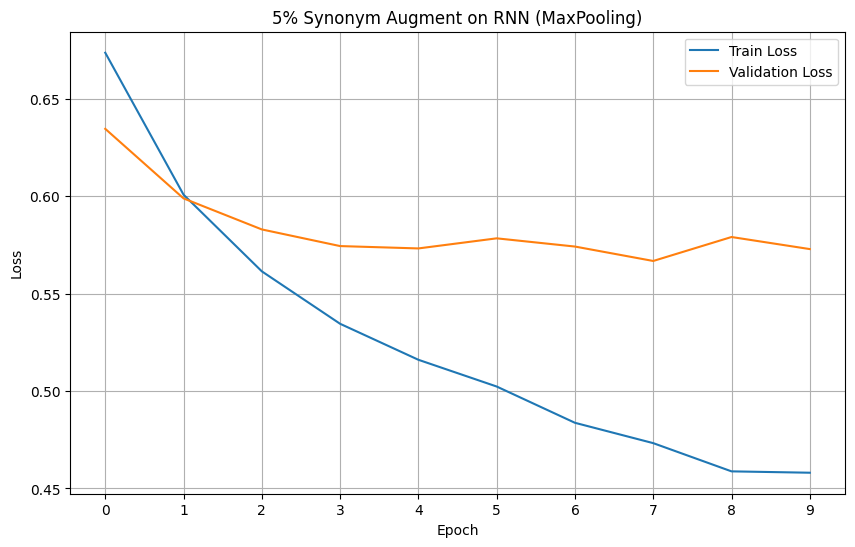

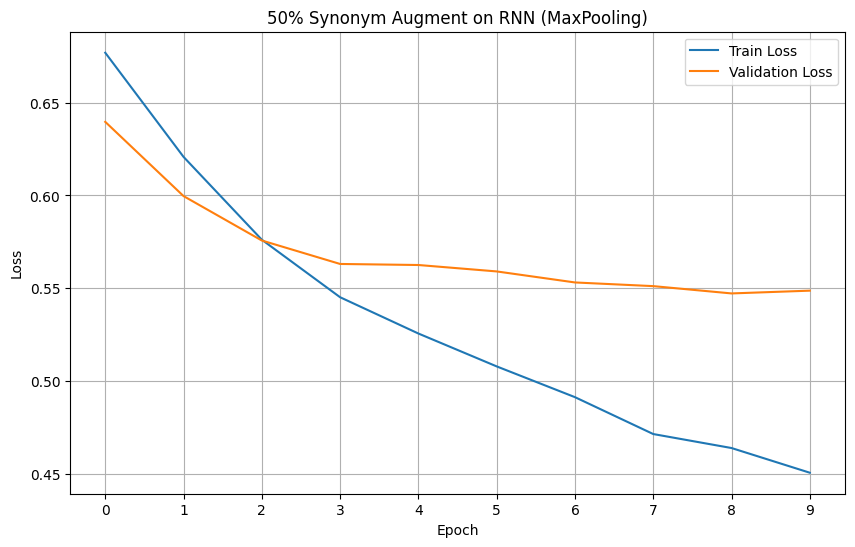

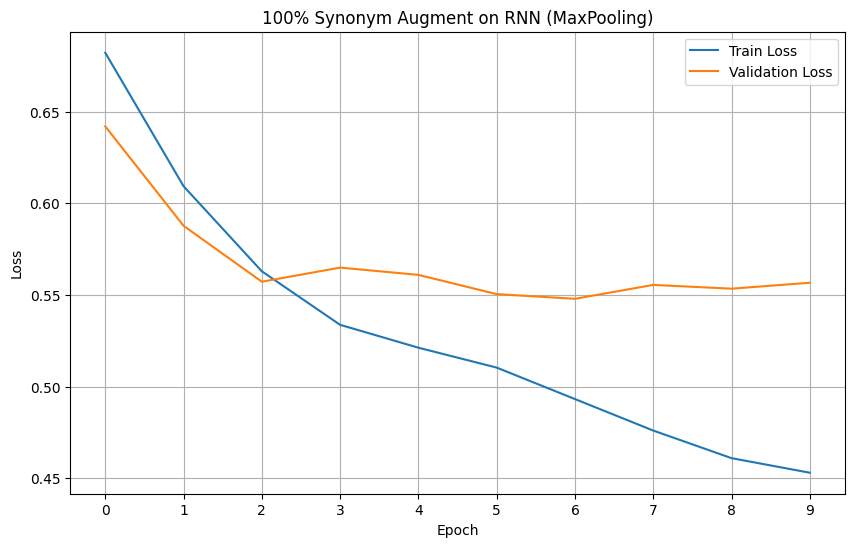

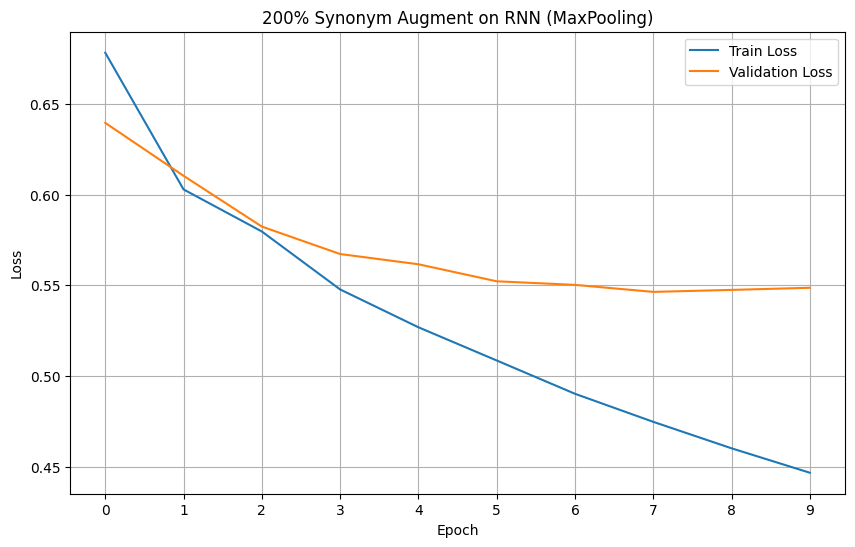

In [11]:
# Plot the loss graph
pipeline_synonym_5.plot_loss(title="5% Synonym Augment on RNN (MaxPooling)")
pipeline_synonym_10.plot_loss(title="10% Synonym Augment on RNN (MaxPooling)")
pipeline_synonym_20.plot_loss(title="20% Synonym Augment on RNN (MaxPooling)")
pipeline_synonym_50.plot_loss(title="50% Synonym Augment on RNN (MaxPooling)")
pipeline_synonym_100.plot_loss(title="100% Synonym Augment on RNN (MaxPooling)")
pipeline_synonym_200.plot_loss(title="200% Synonym Augment on RNN (MaxPooling)")

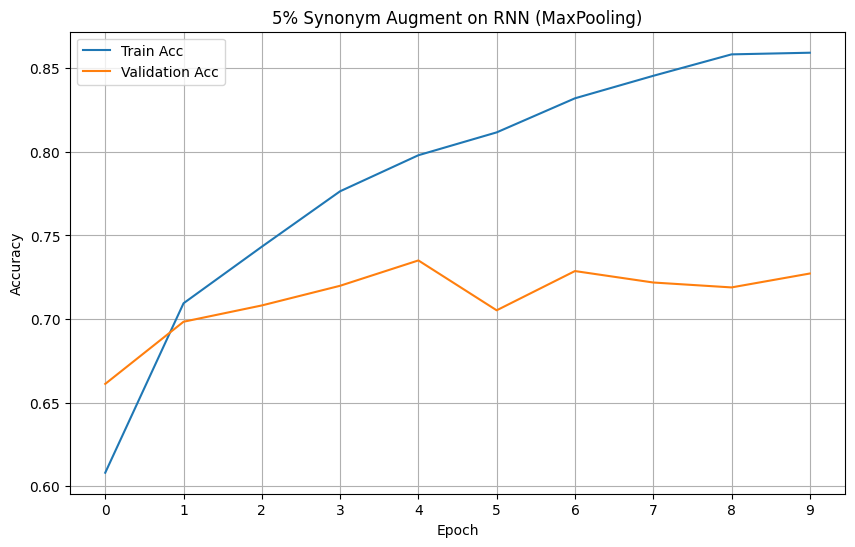

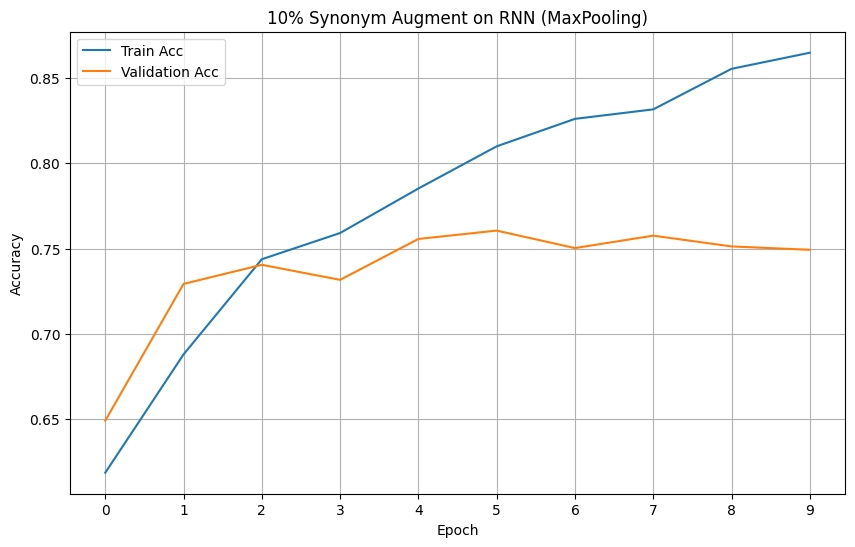

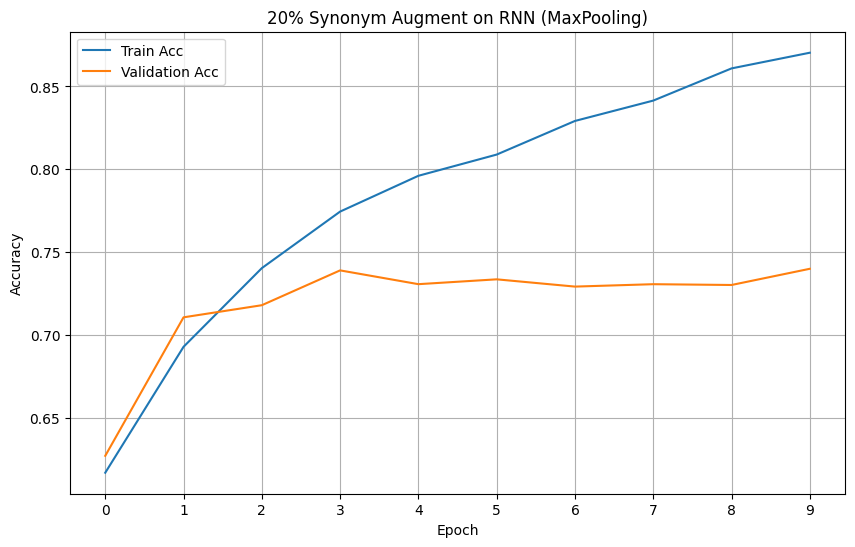

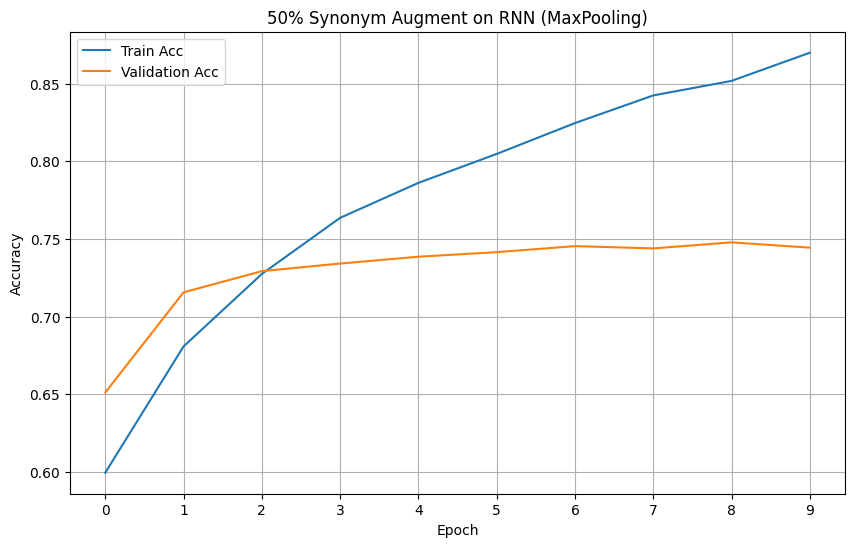

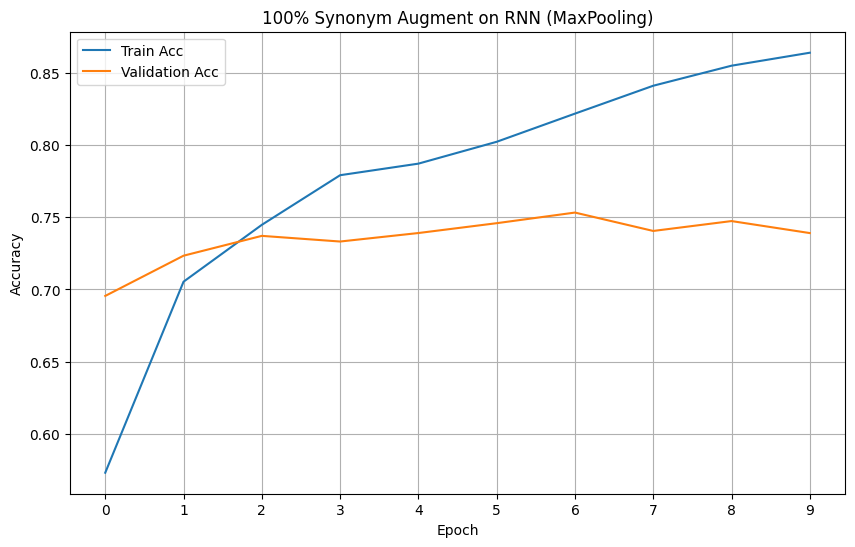

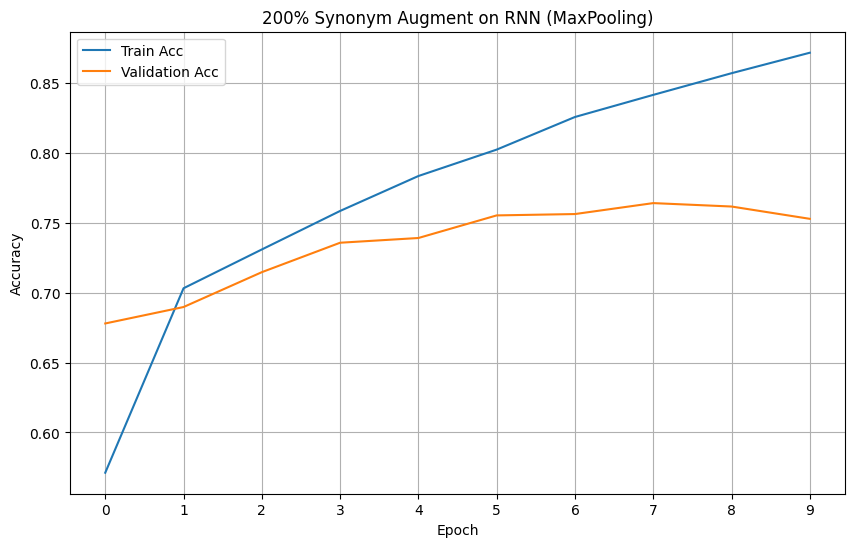

In [12]:
# Plot the acc graph
pipeline_synonym_5.plot_acc(title="5% Synonym Augment on RNN (MaxPooling)")
pipeline_synonym_10.plot_acc(title="10% Synonym Augment on RNN (MaxPooling)")
pipeline_synonym_20.plot_acc(title="20% Synonym Augment on RNN (MaxPooling)")
pipeline_synonym_50.plot_acc(title="50% Synonym Augment on RNN (MaxPooling)")
pipeline_synonym_100.plot_acc(title="100% Synonym Augment on RNN (MaxPooling)")
pipeline_synonym_200.plot_acc(title="200% Synonym Augment on RNN (MaxPooling)")

# Performance of Synonym Augmentation on LSTM

In [13]:
pipeline_synonym_5_LSTM= TextClassificationPipeline(
    augmented_data=augmented_synonym_train_data_5, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)
pipeline_synonym_10_LSTM = TextClassificationPipeline(
    augmented_data=augmented_synonym_train_data_10, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)
pipeline_synonym_20_LSTM = TextClassificationPipeline(
    augmented_data=augmented_synonym_train_data_20, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)
pipeline_synonym_50_LSTM = TextClassificationPipeline(
    augmented_data=augmented_synonym_train_data_50, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)
pipeline_synonym_100_LSTM = TextClassificationPipeline(
    augmented_data=augmented_synonym_train_data_100, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)
pipeline_synonym_200_LSTM = TextClassificationPipeline(
    augmented_data=augmented_synonym_train_data_200, 
    test_data=original_test_data, 
    max_length=128, 
    test_size=0.2,
    model_type=ModelType.LSTM
)


Map:   0%|          | 0/8530 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/6824 [00:00<?, ? examples/s]

Map:   0%|          | 0/1706 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/8530 [00:00<?, ? examples/s]

Map:   0%|          | 0/6824 [00:00<?, ? examples/s]

Map:   0%|          | 0/1706 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/8530 [00:00<?, ? examples/s]

Map:   0%|          | 0/6824 [00:00<?, ? examples/s]

Map:   0%|          | 0/1706 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/8530 [00:00<?, ? examples/s]

Map:   0%|          | 0/6824 [00:00<?, ? examples/s]

Map:   0%|          | 0/1706 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/8530 [00:00<?, ? examples/s]

Map:   0%|          | 0/6824 [00:00<?, ? examples/s]

Map:   0%|          | 0/1706 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

Map:   0%|          | 0/8530 [00:00<?, ? examples/s]

Map:   0%|          | 0/6824 [00:00<?, ? examples/s]

Map:   0%|          | 0/1706 [00:00<?, ? examples/s]

Map:   0%|          | 0/1066 [00:00<?, ? examples/s]

In [14]:
pipeline_synonym_5_LSTM.train_model(n_epochs=10)
pipeline_synonym_10_LSTM.train_model(n_epochs=10)
pipeline_synonym_20_LSTM.train_model(n_epochs=10)
pipeline_synonym_50_LSTM.train_model(n_epochs=10)
pipeline_synonym_100_LSTM.train_model(n_epochs=10)
pipeline_synonym_200_LSTM.train_model(n_epochs=10)

evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.19it/s]


Epoch: 1/10
Train Loss: 0.683, Train Acc: 0.606
Valid Loss: 0.656, Valid Acc: 0.627


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.33it/s]


Epoch: 2/10
Train Loss: 0.603, Train Acc: 0.693
Valid Loss: 0.601, Valid Acc: 0.680


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.25it/s]


Epoch: 3/10
Train Loss: 0.569, Train Acc: 0.726
Valid Loss: 0.568, Valid Acc: 0.729


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]


Epoch: 4/10
Train Loss: 0.537, Train Acc: 0.764
Valid Loss: 0.557, Valid Acc: 0.737


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.26it/s]


Epoch: 5/10
Train Loss: 0.522, Train Acc: 0.782
Valid Loss: 0.548, Valid Acc: 0.746


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]


Epoch: 6/10
Train Loss: 0.504, Train Acc: 0.801
Valid Loss: 0.554, Valid Acc: 0.745


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.27it/s]


Epoch: 7/10
Train Loss: 0.493, Train Acc: 0.815
Valid Loss: 0.556, Valid Acc: 0.741


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.30it/s]


Epoch: 8/10
Train Loss: 0.484, Train Acc: 0.825
Valid Loss: 0.551, Valid Acc: 0.756


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.18it/s]


Epoch: 9/10
Train Loss: 0.469, Train Acc: 0.842
Valid Loss: 0.555, Valid Acc: 0.754


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.33it/s]


Epoch: 10/10
Train Loss: 0.466, Train Acc: 0.845
Valid Loss: 0.549, Valid Acc: 0.759


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.11it/s]


Epoch: 1/10
Train Loss: 0.682, Train Acc: 0.575
Valid Loss: 0.637, Valid Acc: 0.663


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.30it/s]


Epoch: 2/10
Train Loss: 0.618, Train Acc: 0.667
Valid Loss: 0.581, Valid Acc: 0.707


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.04it/s]


Epoch: 3/10
Train Loss: 0.569, Train Acc: 0.728
Valid Loss: 0.562, Valid Acc: 0.736


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.16it/s]


Epoch: 4/10
Train Loss: 0.539, Train Acc: 0.764
Valid Loss: 0.546, Valid Acc: 0.755


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]


Epoch: 5/10
Train Loss: 0.516, Train Acc: 0.786
Valid Loss: 0.542, Valid Acc: 0.762


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.15it/s]


Epoch: 6/10
Train Loss: 0.506, Train Acc: 0.798
Valid Loss: 0.546, Valid Acc: 0.760


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.19it/s]


Epoch: 7/10
Train Loss: 0.498, Train Acc: 0.809
Valid Loss: 0.541, Valid Acc: 0.761


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.94it/s]


Epoch: 8/10
Train Loss: 0.480, Train Acc: 0.828
Valid Loss: 0.542, Valid Acc: 0.764


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.19it/s]


Epoch: 9/10
Train Loss: 0.472, Train Acc: 0.838
Valid Loss: 0.542, Valid Acc: 0.762


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.12it/s]


Epoch: 10/10
Train Loss: 0.461, Train Acc: 0.851
Valid Loss: 0.550, Valid Acc: 0.752


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.21it/s]


Epoch: 1/10
Train Loss: 0.688, Train Acc: 0.558
Valid Loss: 0.662, Valid Acc: 0.614


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.26it/s]


Epoch: 2/10
Train Loss: 0.604, Train Acc: 0.691
Valid Loss: 0.599, Valid Acc: 0.683


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]


Epoch: 3/10
Train Loss: 0.552, Train Acc: 0.746
Valid Loss: 0.585, Valid Acc: 0.711


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.26it/s]


Epoch: 4/10
Train Loss: 0.534, Train Acc: 0.773
Valid Loss: 0.572, Valid Acc: 0.722


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.04it/s]


Epoch: 5/10
Train Loss: 0.521, Train Acc: 0.781
Valid Loss: 0.557, Valid Acc: 0.741


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.28it/s]


Epoch: 6/10
Train Loss: 0.498, Train Acc: 0.808
Valid Loss: 0.568, Valid Acc: 0.735


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.97it/s]


Epoch: 7/10
Train Loss: 0.478, Train Acc: 0.828
Valid Loss: 0.570, Valid Acc: 0.733


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.27it/s]


Epoch: 8/10
Train Loss: 0.469, Train Acc: 0.839
Valid Loss: 0.572, Valid Acc: 0.729


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.19it/s]


Epoch: 9/10
Train Loss: 0.455, Train Acc: 0.858
Valid Loss: 0.586, Valid Acc: 0.717


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.15it/s]


Epoch: 10/10
Train Loss: 0.453, Train Acc: 0.858
Valid Loss: 0.568, Valid Acc: 0.736


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.32it/s]


Epoch: 1/10
Train Loss: 0.686, Train Acc: 0.574
Valid Loss: 0.649, Valid Acc: 0.646


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.16it/s]


Epoch: 2/10
Train Loss: 0.606, Train Acc: 0.692
Valid Loss: 0.568, Valid Acc: 0.734


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.22it/s]


Epoch: 3/10
Train Loss: 0.578, Train Acc: 0.724
Valid Loss: 0.566, Valid Acc: 0.740


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.19it/s]


Epoch: 4/10
Train Loss: 0.549, Train Acc: 0.758
Valid Loss: 0.658, Valid Acc: 0.659


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.19it/s]


Epoch: 5/10
Train Loss: 0.664, Train Acc: 0.647
Valid Loss: 0.612, Valid Acc: 0.691


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.14it/s]


Epoch: 6/10
Train Loss: 0.557, Train Acc: 0.753
Valid Loss: 0.580, Valid Acc: 0.727


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.30it/s]


Epoch: 7/10
Train Loss: 0.537, Train Acc: 0.768
Valid Loss: 0.559, Valid Acc: 0.738


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.15it/s]


Epoch: 8/10
Train Loss: 0.519, Train Acc: 0.790
Valid Loss: 0.551, Valid Acc: 0.747


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.26it/s]


Epoch: 9/10
Train Loss: 0.502, Train Acc: 0.806
Valid Loss: 0.550, Valid Acc: 0.756


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.19it/s]


Epoch: 10/10
Train Loss: 0.485, Train Acc: 0.825
Valid Loss: 0.552, Valid Acc: 0.755


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.81it/s]


Epoch: 1/10
Train Loss: 0.688, Train Acc: 0.550
Valid Loss: 0.650, Valid Acc: 0.689


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.25it/s]


Epoch: 2/10
Train Loss: 0.609, Train Acc: 0.693
Valid Loss: 0.582, Valid Acc: 0.720


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.26it/s]


Epoch: 3/10
Train Loss: 0.564, Train Acc: 0.742
Valid Loss: 0.587, Valid Acc: 0.707


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.27it/s]


Epoch: 4/10
Train Loss: 0.539, Train Acc: 0.762
Valid Loss: 0.578, Valid Acc: 0.714


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.13it/s]


Epoch: 5/10
Train Loss: 0.526, Train Acc: 0.772
Valid Loss: 0.577, Valid Acc: 0.720


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.19it/s]


Epoch: 6/10
Train Loss: 0.517, Train Acc: 0.787
Valid Loss: 0.585, Valid Acc: 0.715


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.24it/s]


Epoch: 7/10
Train Loss: 0.512, Train Acc: 0.791
Valid Loss: 0.574, Valid Acc: 0.713


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.28it/s]


Epoch: 8/10
Train Loss: 0.499, Train Acc: 0.809
Valid Loss: 0.587, Valid Acc: 0.715


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.10it/s]


Epoch: 9/10
Train Loss: 0.487, Train Acc: 0.822
Valid Loss: 0.573, Valid Acc: 0.730


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.30it/s]


Epoch: 10/10
Train Loss: 0.473, Train Acc: 0.841
Valid Loss: 0.586, Valid Acc: 0.721


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  2.95it/s]


Epoch: 1/10
Train Loss: 0.685, Train Acc: 0.563
Valid Loss: 0.648, Valid Acc: 0.619


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.08it/s]


Epoch: 2/10
Train Loss: 0.600, Train Acc: 0.694
Valid Loss: 0.590, Valid Acc: 0.715


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.03it/s]


Epoch: 3/10
Train Loss: 0.556, Train Acc: 0.741
Valid Loss: 0.564, Valid Acc: 0.728


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]


Epoch: 4/10
Train Loss: 0.527, Train Acc: 0.776
Valid Loss: 0.575, Valid Acc: 0.726


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.15it/s]


Epoch: 5/10
Train Loss: 0.510, Train Acc: 0.793
Valid Loss: 0.560, Valid Acc: 0.733


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.15it/s]


Epoch: 6/10
Train Loss: 0.494, Train Acc: 0.813
Valid Loss: 0.577, Valid Acc: 0.727


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.13it/s]


Epoch: 7/10
Train Loss: 0.482, Train Acc: 0.827
Valid Loss: 0.560, Valid Acc: 0.742


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.13it/s]


Epoch: 8/10
Train Loss: 0.469, Train Acc: 0.841
Valid Loss: 0.568, Valid Acc: 0.739


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.23it/s]


Epoch: 9/10
Train Loss: 0.467, Train Acc: 0.843
Valid Loss: 0.569, Valid Acc: 0.738


evaluating...: 100%|██████████| 4/4 [00:01<00:00,  3.37it/s]

Epoch: 10/10
Train Loss: 0.458, Train Acc: 0.853
Valid Loss: 0.568, Valid Acc: 0.738


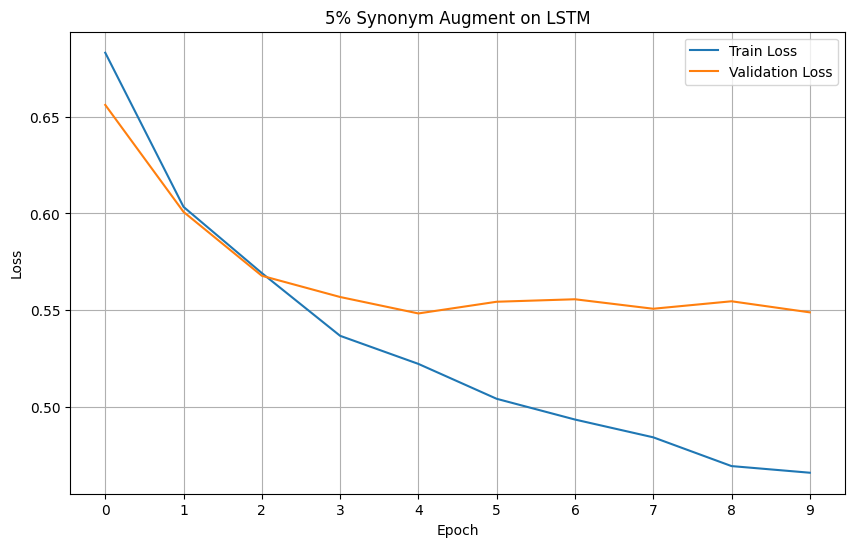

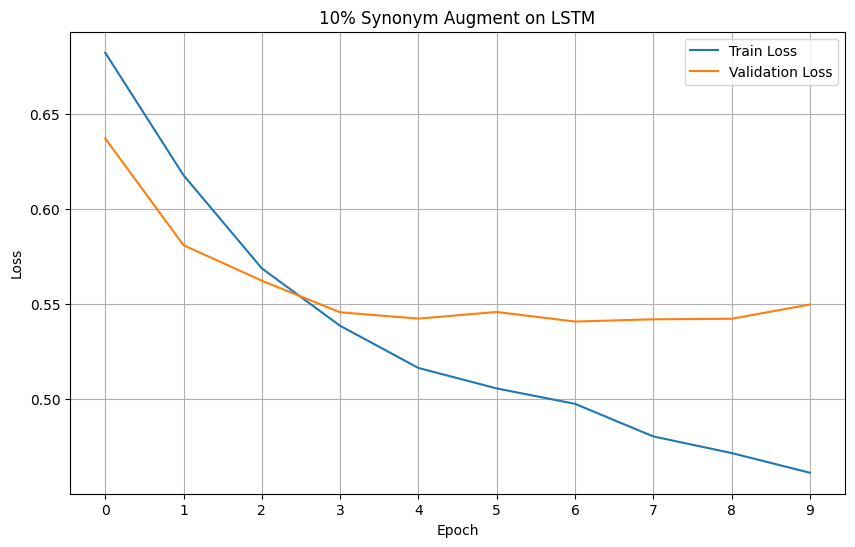

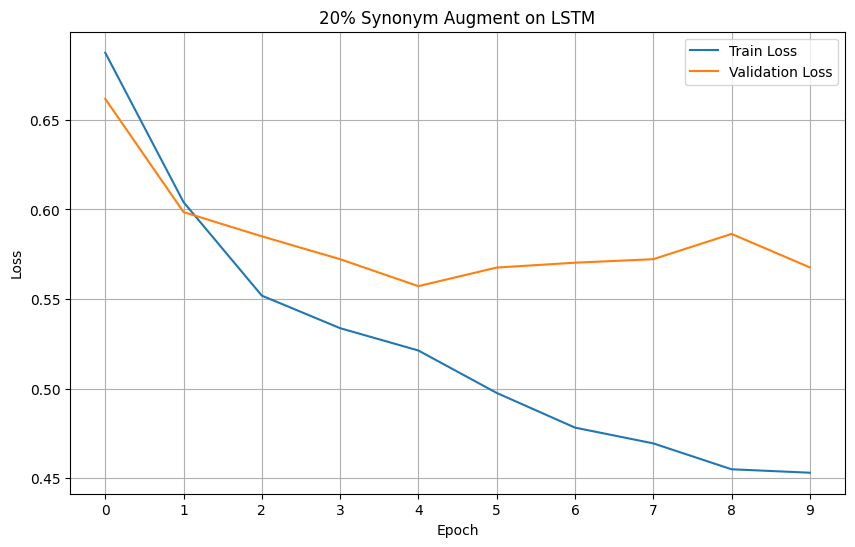

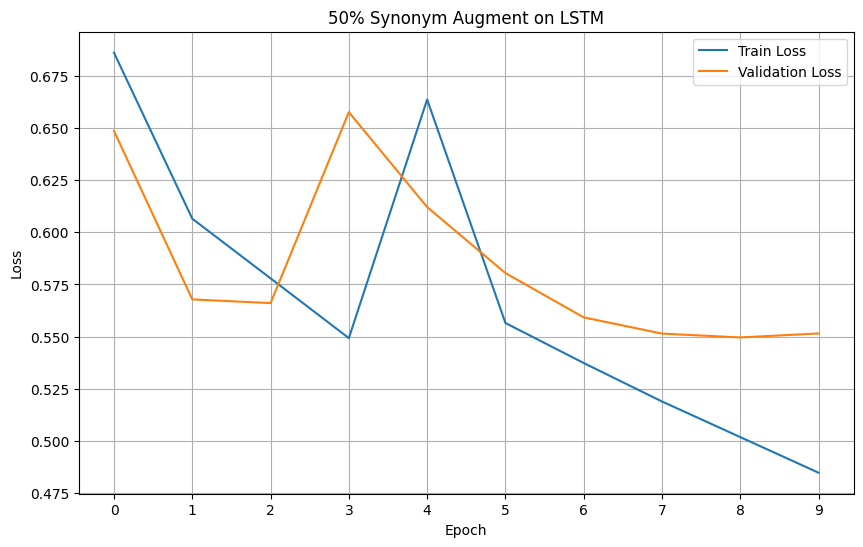

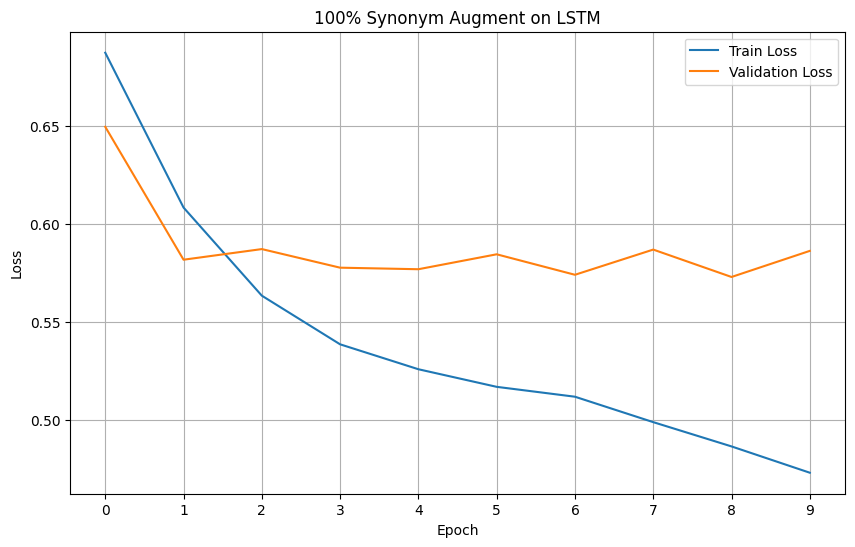

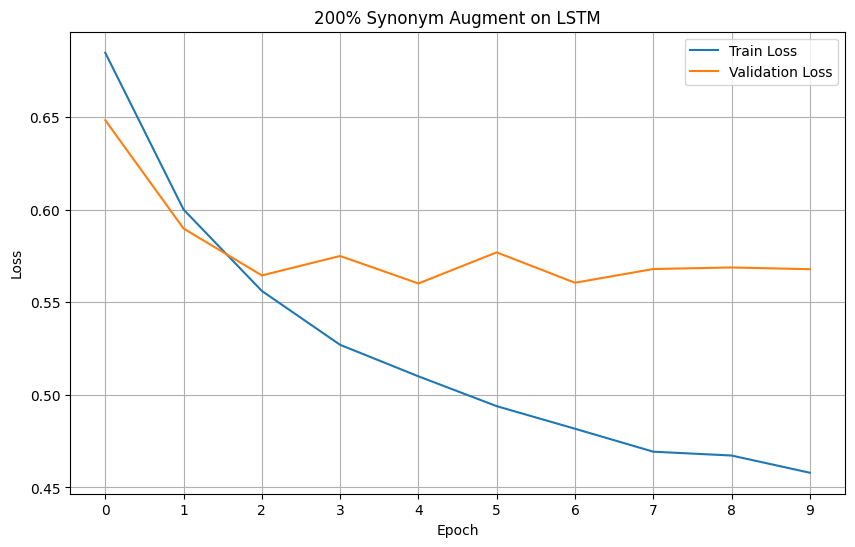

In [15]:
pipeline_synonym_5_LSTM.plot_loss(title="5% Synonym Augment on LSTM")
pipeline_synonym_10_LSTM.plot_loss(title="10% Synonym Augment on LSTM")
pipeline_synonym_20_LSTM.plot_loss(title="20% Synonym Augment on LSTM")
pipeline_synonym_50_LSTM.plot_loss(title="50% Synonym Augment on LSTM")
pipeline_synonym_100_LSTM.plot_loss(title="100% Synonym Augment on LSTM")
pipeline_synonym_200_LSTM.plot_loss(title="200% Synonym Augment on LSTM")

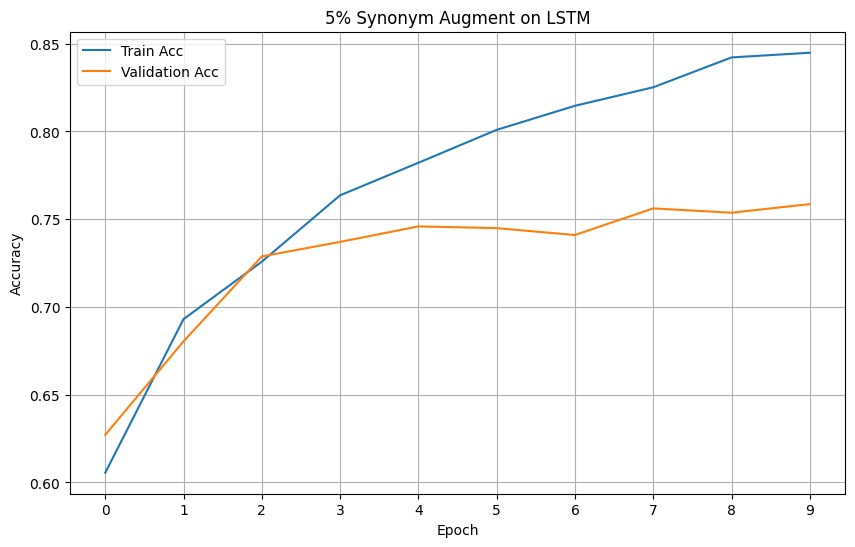

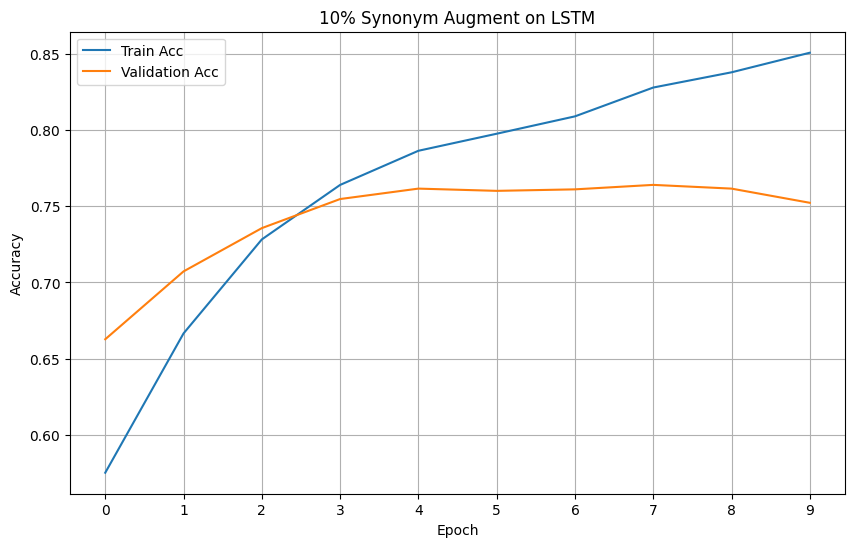

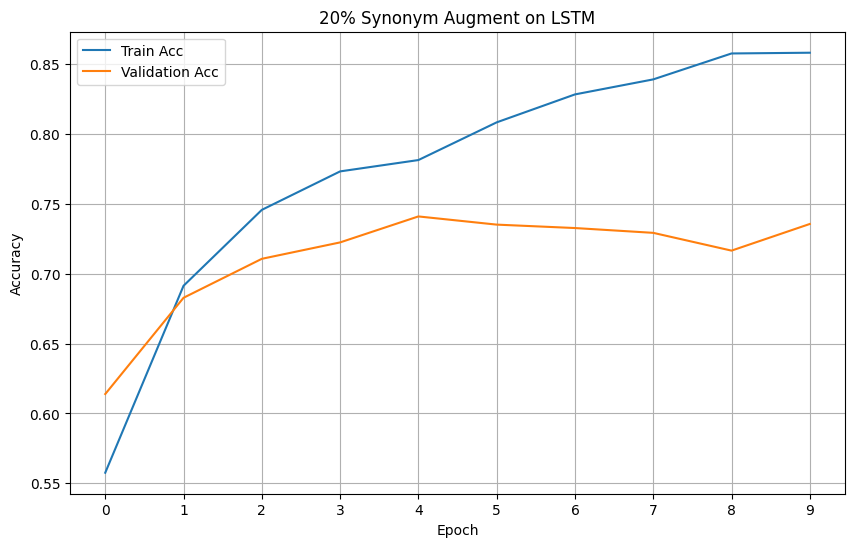

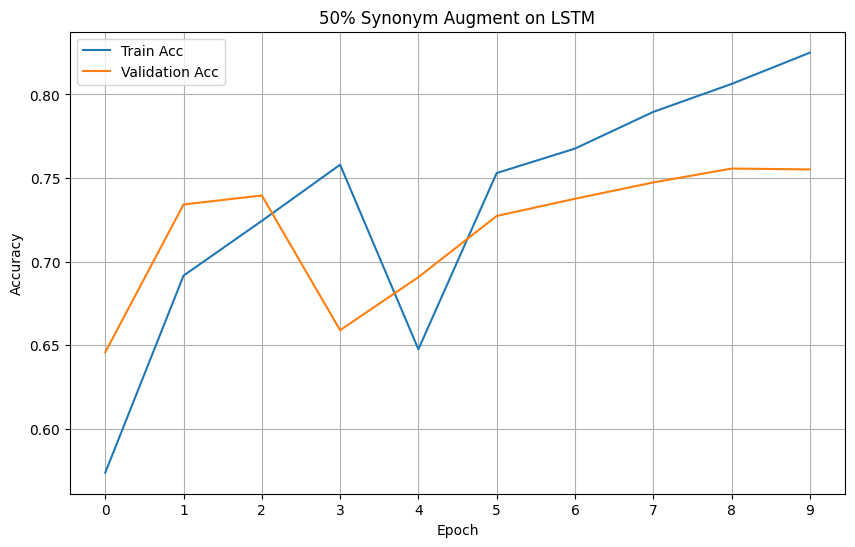

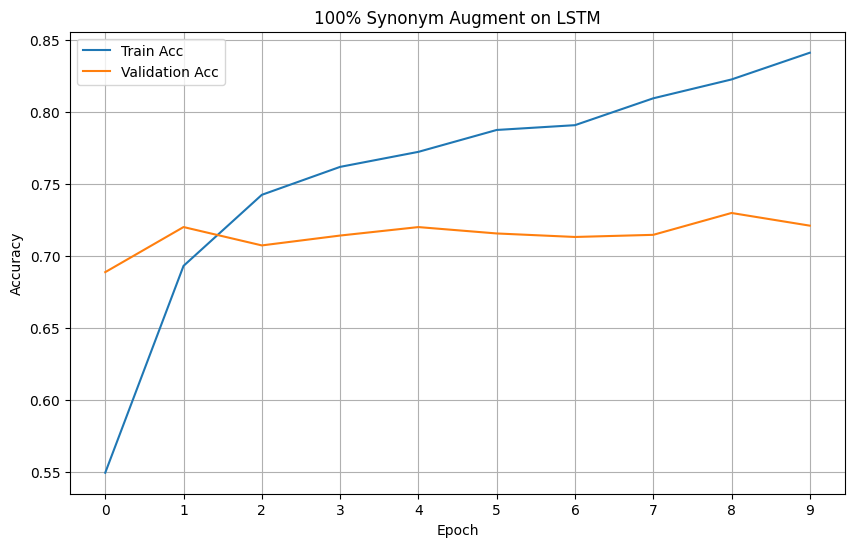

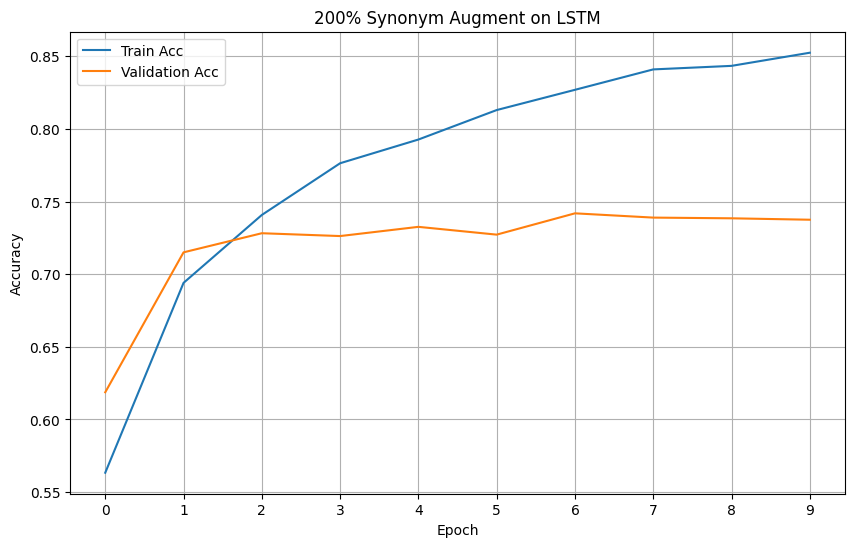

In [16]:
pipeline_synonym_5_LSTM.plot_acc("5% Synonym Augment on LSTM")
pipeline_synonym_10_LSTM.plot_acc("10% Synonym Augment on LSTM")
pipeline_synonym_20_LSTM.plot_acc("20% Synonym Augment on LSTM")
pipeline_synonym_50_LSTM.plot_acc("50% Synonym Augment on LSTM")
pipeline_synonym_100_LSTM.plot_acc("100% Synonym Augment on LSTM")
pipeline_synonym_200_LSTM.plot_acc("200% Synonym Augment on LSTM")